In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
from IPython.display import clear_output

In [2]:
#define a city class

class City:
    def __init__(self,ccode,name,region,population,lat,long):
        self.ccode = str(ccode)
        self.name = str(name)
        self.region = str(region)
        self.population = int(population)
        self.lat = float(lat)
        self.long = float(long)
        
    def __str__(self):
        return str(self.name)+","+str(self.population)+","+str(self.lat)+","+str(self.long)
    
    def get_population(self):
        return self.population
    
    def get_latitude(self):
        return self.lat
    
    def get_name(self):
        return self.name

In [3]:
# ***************** PROVIDED CODE ************************** #
# Performs the quicksort algorithm.

# Partition the sublist the_list[p ... r] so that the pivot
# (originally in the_list[r]) moves to the_list[q],
# all items in the_list[p ... q-1] are less than or equal to the pivot,
# and all items in the_list[q+1 ... r] are greater than the pivot.
# Return the index q where the pivot ends up.
def partition(the_list, p, r, compare_func):
    pivot = the_list[r]
    
    # Set up the indices i and j so that
    #    the_list[p ... i] contains items <= pivot,
    #    the_list[i+1 ... j-1] contains items > pivot, and
    #    the_list[j ... r-1] contains items not yet compared with the pivot.
    i = p - 1
    j = p
    while j < r:
        if compare_func(the_list[j], pivot):
            # Move this item into the section known to be <= pivot.
            i += 1
            (the_list[i], the_list[j]) = (the_list[j], the_list[i])
        j += 1
            
    # Get the pivot into the correct position.
    (the_list[i+1], the_list[r]) = (the_list[r], the_list[i+1])
    return i+1

# Sort the sublist the_list[p ... r] using the quicksort algorithm.
def quicksort(the_list, p, r, compare_func):
    if p < r:   # nothing to do if the sublist has fewer than 2 items
        q = partition(the_list, p, r, compare_func) # divide
        quicksort(the_list, p, q-1, compare_func)   # conquer smaller items
        quicksort(the_list, q+1, r, compare_func)   # conquer larger items

# Sort the_list by running quicksort on it.        
def sort(the_list, compare_func):
    quicksort(the_list, 0, len(the_list)-1, compare_func)

# Return True if city1 has the same or higher population than city2.
def compare_population(city1, city2):
    return city1.get_population() >= city2.get_population()

# Return True if city1 comes at or before city2 alphabetically.
def compare_name(city1, city2):
    return city1.get_name().lower() <= city2.get_name().lower()

# Return True if city1's latitude is less than or equal to city2's latitude.
def compare_latitude(city1, city2):
    return city1.get_latitude() <= city2.get_latitude()

In [4]:
#Pull in the World Cities Data from the Text File

cities_list = []
file = open("world_cities.txt","r")

for line in file:
    data = line.split(",")
    cities_list.append(City(data[0],data[1],data[2],data[3],data[4],data[5]))
    
file.close()

In [5]:
#Sort the Cities by Name and Export it to a txt file
sort(cities_list,compare_name)

out_file = open("cities_name.txt","w")
for city in cities_list:
    out_file.write(str(city)+"\n")
out_file.close()

In [6]:
#Sort the cities by population and export it to a txt file
sort(cities_list,compare_population)

out_file = open("cities_population.txt","w")
for city in cities_list:
    out_file.write(str(city)+"\n")
out_file.close()

In [7]:
#Sort the cities by latitude and export it to a txt file
sort(cities_list,compare_latitude)

out_file = open("cities_latitude.txt","w")
for city in cities_list:
    out_file.write(str(city)+"\n")
out_file.close()

In [8]:
# ***************** PROVIDED CODE ************************** #

# Convert a latitude and longitude to pixel locations.
# WIDTH & HEIGHT should be defined to be the size of the image (in pixels)
def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return center_x, center_y

In [9]:
#Open the TXT file and create a sublist of the items that I will use for the animated map

file = open("cities_population.txt","r")
i=0
WIDTH = 720
HEIGHT = 360
dpi = 60
sublist=np.empty([29,3], dtype="object")
i=0
for line in file:
    data = line.split(",")
    x,y=longlat_to_pixel(float(data[2]), float(data[3]))
    sublist[i][0] = data[0]
    sublist[i][1] = x
    sublist[i][2] = y
    i+=1
    if i==29:
        break

print(sublist)


[['Tokyo' 640 109]
 ['Shanghai' 603 118]
 ['Bombay' 506 142]
 ['Karachi' 494 130]
 ['Delhi' 514 123]
 ['New Delhi' 514 123]
 ['Manila' 602 151]
 ['Moscow' 435 68]
 ['Seoul' 614 105]
 ['Sao Paulo' 267 227]
 ['Istanbul' 418 98]
 ['Lagos' 367 167]
 ['Mexico' 162 141]
 ['Jakarta' 574 192]
 ['New York' 212 99]
 ['Kinshasa' 391 189]
 ['Cairo' 422 120]
 ['Lima' 206 204]
 ['Peking' 593 100]
 ['London' 360 77]
 ['Bogota' 212 171]
 ['Dhaka' 541 133]
 ['Lahore' 509 117]
 ['Rio De Janeiro' 274 226]
 ['Baghdad' 449 113]
 ['Bangkok' 561 152]
 ['Bangalore' 515 154]
 ['Santiago' 219 247]
 ['Calcutta' 537 135]]


In [10]:
#create a function to iterate through the values that are being plotted?

def plot_cities(the_list):
    
    #create the current plot points
    prev_lat=[]
    prev_long=[]
    
    #create the loop for iterating through the plot
    for i in range(0,len(the_list)):
        
        #set up the screen
        width = 720
        height = 360
        dpi = 60
        img = plt.imread("world.jpeg")
        plt.figure(figsize=(width/dpi,height/dpi))
        plt.imshow(img)
        plt.axis('off')
         
        #plot the previous items
        plt.plot(prev_lat,prev_long,'bo')
        
        #save the new items to the list
        x=the_list[i][1]
        y=the_list[i][2]
        plt.plot(x,y,'ro')
        plt.text((x+20),(y+20), the_list[i][0], fontsize='large', color='white', backgroundcolor='red', fontweight='bold')
        plt.show()
        
        #add the new items to the list
        prev_lat.append(x)
        prev_long.append(y)
        
        #pause the animation and clear the screen
        time.sleep(0.7)
        clear_output(wait=True)
        
        

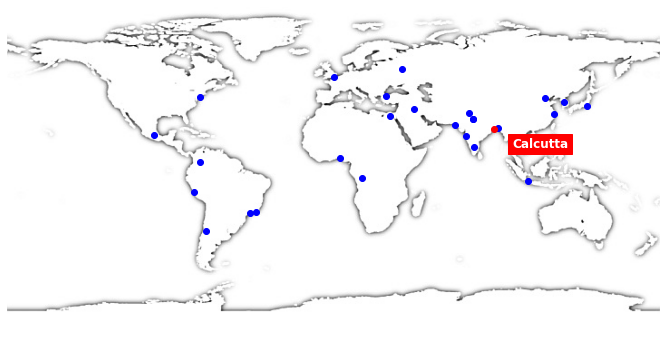

In [15]:
#Present the animation

plot_cities(sublist)